# C_Elegans_DME_imagedata_analysis-transition_days

## Version 2.x WND-CHARM features, & w/o mean/std normalization

## Package versions used below

In [1]:
from wndcharm import diagnostics

In [2]:
print diagnostics

WND-CHARM Python API Diagnostics
Executable:
	/usr/local/opt/python/bin/python2.7
PYTHONPATH environment variable:
	/Users/colettace/src/wnd-charm/build/lib.macosx-10.10-x86_64-2.7
WND-CHARM library path:
	/Users/colettace/src/wnd-charm/build/lib.macosx-10.10-x86_64-2.7/wndcharm/wndcharm.pyc
Package versions:
	python    	2.7.11 (default, Jan 22 2016, 08:28:37)  [GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
	wndcharm  	0.9.12+ac234f9localmod
	numpy     	1.11.0
	scipy     	0.17.0
	matplotlib	1.5.1
	sklearn   	0.17.1
	IPython   	4.2.0
	tifffile  	0.7.0
	PIL       	1.1.7
	pandas    	0.17.1



In [3]:
from wndcharm.FeatureSpace import FeatureSpace

In [4]:
from wndcharm.FeatureSpacePrediction import FeatureSpaceClassification

In [5]:
from wndcharm.FeatureWeights import FisherFeatureWeights

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
import numpy as np

In [9]:
from matplotlib.table import table # factory function to generate Table instance

In [10]:
from scipy.spatial.distance import pdist, cdist, squareform

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Load features

In [12]:
pwd

u'/Users/colettace/projects/dme_pca'

In [13]:
ls *.fit

167Evens.fit*
All.fit*
StateB.fit*
StateB_n320-l-S2048_341StateLabels.fit
StateBalanced.fit*
dme_c_elegans_lifeaspan_LDA_featspace.fit
dme_c_elegans_lifeaspan_v3.2features_curated.fit
dme_c_elegans_lifeaspan_v3.2features_curated2.fit
dme_c_elegans_lifeaspan_v3.2features_curated3.fit
dme_c_elegans_lifespan-l.fit


In [14]:
stateb = FeatureSpace.NewFromFitFile('StateB.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE StateB.fit: <FeatureSpace "StateB.fit" n_features=2919 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>


In [15]:
stateb.feature_set_version

'2.2'

In [16]:
trans = FeatureSpace.NewFromFitFile('./pharynx_classification_results/dme_celegans_microarray_samples_v2.2features.fit' )

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE ./pharynx_classification_results/dme_celegans_microarray_samples_v2.2features.fit: <FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit" n_features=2919 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>


In [17]:
trans.feature_set_version

'2.2'

# Create Marginal probability space for StateB data set

## Fit-on-fit classification of state classifer to get marginal probabilities

In [18]:
stateb

<FeatureSpace "StateB.fit" n_features=2919 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>

In [19]:
stateb.Normalize(inplace=True)

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "StateB.fit" n_features=2919 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>


<FeatureSpace "StateB.fit" n_features=2919 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>

In [20]:
stateb

<FeatureSpace "StateB.fit" n_features=2919 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>

In [21]:
feature_weights = FisherFeatureWeights.NewFromFeatureSpace( stateb )

In [22]:
feature_weights.Print(10)

FisherFeatureWeights (2919 features)
Rank	Value	Name
====	=====	====
1	0.578110	Edge Features () [0]
2	0.011644	Edge Features () [1]
3	0.049405	Edge Features () [2]
4	0.066558	Edge Features () [3]
5	0.008656	Edge Features () [4]
6	0.262428	Edge Features () [5]
7	0.180956	Edge Features () [6]
8	0.223999	Edge Features () [7]
9	0.410858	Edge Features () [8]
10	0.316142	Edge Features () [9]
<output truncated by user via "display" arg, 2909 more feature weights>


In [23]:
feature_weights = feature_weights.Threshold(0.15)

In [24]:
feature_weights.Print(10)

FisherFeatureWeights (438 features)
Rank	Value	Name
====	=====	====
1	2.699947	Zernike Coefficients (Fourier ()) [54]
2	2.489089	Zernike Coefficients (Fourier (Wavelet ())) [52]
3	2.370871	Zernike Coefficients (Fourier ()) [28]
4	2.309529	Zernike Coefficients (Fourier ()) [69]
5	2.237713	Zernike Coefficients (Fourier ()) [41]
6	2.232273	Zernike Coefficients (Fourier ()) [19]
7	1.716792	Zernike Coefficients (Fourier ()) [39]
8	1.704769	Zernike Coefficients (Fourier ()) [71]
9	1.676778	Zernike Coefficients (Fourier ()) [5]
10	1.624653	Zernike Coefficients (Fourier (Wavelet ())) [39]
<output truncated by user via "display" arg, 428 more feature weights>


In [25]:
stateb.FeatureReduce( feature_weights, inplace=True )

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "StateB.fit (feature reduced)" n_features=438 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>:'


<FeatureSpace "StateB.fit (feature reduced)" n_features=438 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)>

In [26]:
stateb_fit_on_fit = FeatureSpaceClassification.NewWND5( stateb, stateb, feature_weights, quiet=True )

In [27]:
stateb_fit_on_fit.Print()

FeatureSpaceClassification "StateB.fit (feature reduced)" (320 classifications)
234/320 correct = 73.12%
Standard Error: 0.5116
Pearson Coefficient: 0.9329
Coefficient of Determination (r^2): 0.8704
Spearman Coefficient: 0.9284


Confusion Matrix:
 	0	1	2	3	4	|	total	acc.
 	-	-	-	-	-	|	-----	----
0	55	8	1	0	0	|	64	85.94%
1	10	31	22	1	0	|	64	48.44%
2	0	11	43	10	0	|	64	67.19%
3	1	1	11	46	5	|	64	71.88%
4	1	0	0	4	59	|	64	92.19%

Similarity Matrix:
 	0	1	2	3	4
 	-	-	-	-	-
0	1.00	0.24	0.06	0.03	0.02	
1	0.42	1.00	0.59	0.13	0.00	
2	0.10	0.46	1.00	0.30	0.00	
3	0.03	0.09	0.26	1.00	0.20	
4	0.03	0.01	0.00	0.14	1.00	

Average Class Probability Matrix:
 	0	1	2	3	4
 	-	-	-	-	-
0	0.7412	0.1779	0.0469	0.0228	0.0112	
1	0.1939	0.4662	0.2766	0.0612	0.0020	
2	0.0512	0.2464	0.5377	0.1624	0.0023	
3	0.0184	0.0551	0.1631	0.6360	0.1274	
4	0.0219	0.0046	0.0029	0.1169	0.8537	



In [28]:
stateb_fit_on_fit.individual_results[:5]

[<SingleSampleClassification "...ll/All/DME/00/Day0_13.tif" grp=0 seq=1 pred="0" act="0" marg probs={0.955,0.033,0.011,0.002,0.000,} pred=0.06>,
 <SingleSampleClassification "...l/All/DME/00/Day00_09.tif" grp=1 seq=1 pred="0" act="0" marg probs={0.979,0.017,0.002,0.001,0.002,} pred=0.03>,
 <SingleSampleClassification "...l/All/DME/00/Day00_19.tif" grp=2 seq=1 pred="0" act="0" marg probs={0.988,0.010,0.001,0.000,0.000,} pred=0.01>,
 <SingleSampleClassification ".../All/DME/00/Day0.2_35.tif" grp=3 seq=1 pred="0" act="0" marg probs={0.851,0.106,0.023,0.014,0.006,} pred=0.22>,
 <SingleSampleClassification "...ll/All/DME/02/Day2_35.tif" grp=4 seq=1 pred="0" act="0" marg probs={0.372,0.104,0.037,0.343,0.145,} pred=1.78>]

In [29]:
training_space = np.array( [ _.marginal_probabilities for _ in stateb_fit_on_fit.individual_results ] )

In [30]:
training_space.shape

(320, 5)

In [31]:
training_labels = stateb._contiguous_ground_truth_labels

In [32]:
training_labels[:5]

['0', '0', '0', '0', '0']

## Helper functions

In [33]:
from math import pi, sqrt

In [34]:
def DendrogramPlusTable( param_space, labels, chart_title=None, figsize=(8,6), fig=None, ax=None):

    from scipy.cluster.hierarchy import linkage, dendrogram
    
    num_samples, num_dimensions = param_space.shape
    
    # fig, axes = plt.subplots(figsize=(15,5))
    if fig is None and ax is None:
        fig = plt.figure( figsize=figsize )
        ax = fig.add_subplot(111)
    elif fig is None:
        fig = ax.get_figure()
    elif ax is None:
        ax = fig.gca()

    fig.suptitle( chart_title, fontsize=20, y=1.15 )

    centroids = []
    #mean_dists_to_own_cent = []
    #std_dists_to_own_cent = []
    seventy_fifth_percentiles = []
    ninety_fifth_percentiles = []
    class_labels = sorted( list( set( labels ) ) )

    for label in class_labels:
        indices = np.where( [ gt == label for gt in labels] )
        class_features = param_space[ indices ]
        class_centroid = class_features.mean(axis=0)
        centroids.append( class_centroid )
        dists_to_own_cent = cdist( class_features, [class_centroid] )
        #mean_dists_to_own_cent.append( dists_to_own_cent.mean() )
        #std_dists_to_own_cent.append( dists_to_own_cent.std() )
        i75, i95 = np.percentile( dists_to_own_cent, [75,95] )
        seventy_fifth_percentiles.append( i75)
        ninety_fifth_percentiles.append( i95 )

    npcentroids = np.array( centroids )
    dist_mat = squareform( pdist( npcentroids ) )
    unit_dist_mat = dist_mat / dist_mat.max()
    siml_mat = np.ones_like( unit_dist_mat ) - unit_dist_mat
    #linkage_mat = linkage( siml_mat )
    linkage_mat = linkage( siml_mat, 'ward')

    dn = dendrogram( linkage_mat, ax=ax,
           color_threshold=1,
           distance_sort='ascending',
           labels=class_labels,
           show_leaf_counts=True)

    cell_text = []

    for i, centroid_row in enumerate( dist_mat ):
        # for top triangle, pack the left side with spaces
        row = [ '' for j in xrange( i ) ]
        sub_row = centroid_row[i:]

        for val in sub_row:
            row.append( "{:0.2f}".format( val ) )

        #dist_std = std_dists_to_own_cent[i]
        i75 = seventy_fifth_percentiles[i]
        i95 = ninety_fifth_percentiles[i]
        row.append( "{:0.2f}".format( i75 ) )
        row.append( "{:0.2f}".format( i95 ) )
        cell_text.append( row )

    tab = table(ax=ax,
          cellText=cell_text, cellColours=None,
          cellLoc='right', colWidths=None,
          rowLabels=class_labels, rowLoc='left',
          colLabels=class_labels + [ '75%-ile', '95%-ile' ],  colLoc='center',
          loc='top', bbox=None, edges='closed')

    return fig

# State dendrogram, no transitions

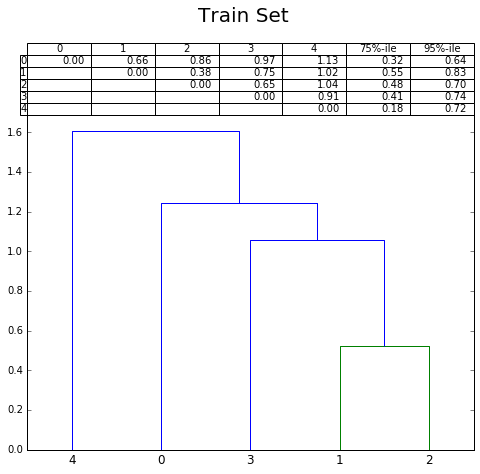

In [35]:
fig = DendrogramPlusTable( training_space, training_labels, chart_title='Train Set')

In [36]:
def PerClassCDF( param_space, labels, chart_title=None):

    class_labels = sorted( list( set( labels ) ) )
    
    n2 = len( class_labels )
    colors = plt.cm.jet( [ float(i)/(n2-1) for i in xrange(n2) ] )
    
    subplot_width = 7
    subplot_height = 7
    subplot_rows = len( class_labels )
    subplot_cols = 2
    subplot_grid_shape = (subplot_rows, subplot_cols)
    figsize = (subplot_width * subplot_cols, subplot_height * subplot_rows)
    fig = plt.figure( figsize=figsize )
    #fig.suptitle( chart_title, fontsize=20, y=.92 )
    
    subplot_title_fontsize = 12

    for i, (label, color) in enumerate( zip( class_labels, colors ) ):
        indices = np.where( [ gt == label for gt in labels] )
        class_features = param_space[ indices ]
        class_centroid = class_features.mean(axis=0)
        dists_to_own_cent = cdist( class_features, [class_centroid] )
        mean = dists_to_own_cent.mean()
        stdev = dists_to_own_cent.std()

        title = 'Histogram of Class {0} Dists to own centroid\nn={1}, mean dist={2:0.2f}, std of dists={3:0.2f}'.format( label, len( class_features ), mean, stdev )
        ax = plt.subplot2grid(subplot_grid_shape, (i,0))
        ax.hist( dists_to_own_cent, 20, facecolor=color, histtype='stepfilled' )
        ax.set_title( title, fontsize=18 )
        
        i75, i95 = np.percentile( dists_to_own_cent, [75,95] )
        ax = plt.subplot2grid(subplot_grid_shape, (i,1))
        ax.hist( dists_to_own_cent, 20, facecolor=color, histtype='stepfilled', cumulative=True )
        title = 'Class {} CDF\n75%-ile={:0.3f}, 95%-ile={:0.3f}'.format( label,i75,i95 )
        ax.set_title( title, fontsize=18 )

    return fig

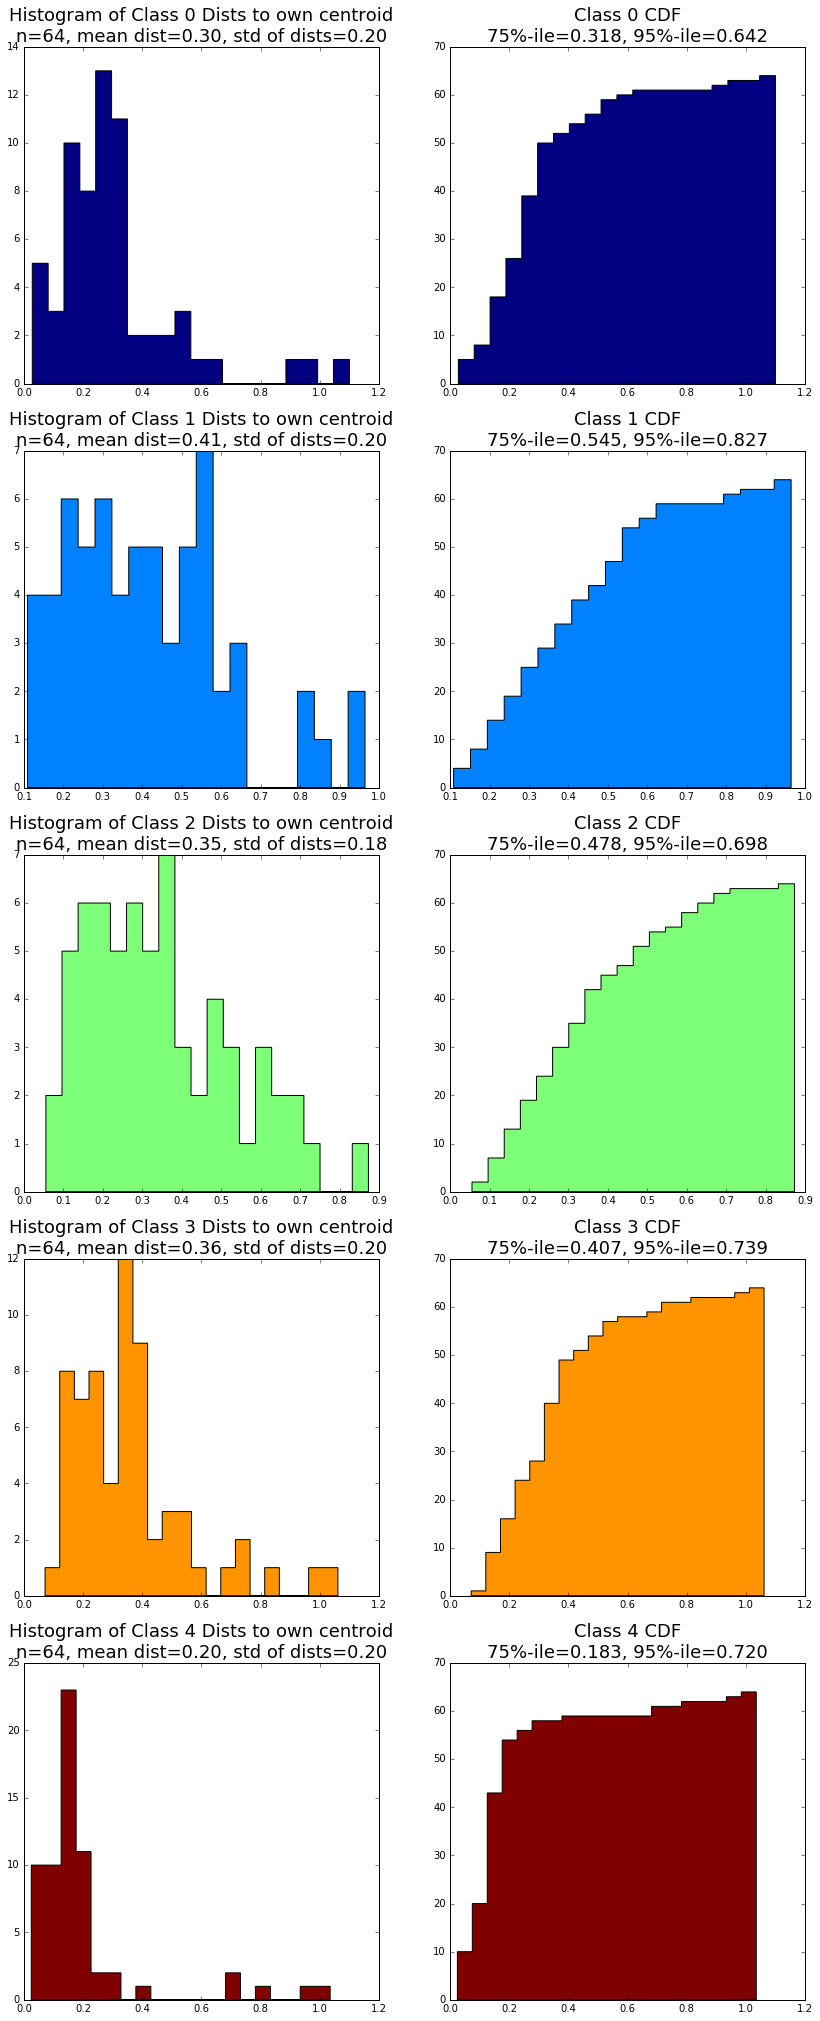

In [37]:
fig = PerClassCDF( training_space, training_labels)

# Classify transition sub-populations characterized by microarray

In [38]:
trans.FeatureReduce( stateb, inplace=True )

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (feature reduced)" n_features=438 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>:'


<FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (feature reduced)" n_features=438 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>

In [39]:
trans.Normalize( stateb, inplace=True)

NORMALIZED FEATURES AGAINST <FeatureSpace "StateB.fit (feature reduced)" n_features=438 n_total_samples=320 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 64, "1": 64, "2": 64, "3": 64, "4": 64)> FOR FEATURE SPACE <FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (feature reduced)" n_features=438 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>


<FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (feature reduced)" n_features=438 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>

In [40]:
trans_result = FeatureSpaceClassification.NewWND5( stateb, trans, feature_weights, quiet=True)

As you can see in the result below, the classifications reproduce/are replicated as they were on the day of collection:

In [41]:
trans_result.Print()

FeatureSpaceClassification "StateB.fit (feature reduced)" (2034 classifications)
2034/2034 correct = 100.00%
Standard Error: 0.3881
Pearson Coefficient: 0.9380
Coefficient of Determination (r^2): 0.8798
Spearman Coefficient: 0.9401


Confusion Matrix:
 	0	1	2	3	4	|	total	acc.
 	-	-	-	-	-	|	-----	----
0	151	0	0	0	0	|	151	100.00%
1	0	564	0	0	0	|	564	100.00%
2	0	0	638	0	0	|	638	100.00%
3	0	0	0	560	0	|	560	100.00%
4	0	0	0	0	121	|	121	100.00%

Similarity Matrix:
 	0	1	2	3	4
 	-	-	-	-	-
0	1.00	0.50	0.18	0.05	0.00	
1	0.32	1.00	0.32	0.10	0.01	
2	0.05	0.26	1.00	0.18	0.00	
3	0.06	0.13	0.23	1.00	0.15	
4	0.02	0.03	0.01	0.27	1.00	

Average Class Probability Matrix:
 	0	1	2	3	4
 	-	-	-	-	-
0	0.5785	0.2870	0.1054	0.0280	0.0011	
1	0.1853	0.5713	0.1825	0.0568	0.0041	
2	0.0325	0.1754	0.6710	0.1195	0.0017	
3	0.0364	0.0836	0.1447	0.6368	0.0985	
4	0.0134	0.0191	0.0101	0.2028	0.7545	



## Microarray batch info

In [42]:
use_these = {
#Microarray sample 1C
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/0
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/1
'2014-01-13': [('1', '1C'),],

#Microarray sample 2A (state 1 late)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-29/1
#Microarray sample 3A (state 2 early)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-29/2 
'2014-01-29' : [('1','2A'), ('2', '3A'),],
    
#Microarray sample 4E (late state 2)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-09/2/*.tif
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-09/3/*.tif
'2013-12-09' : [('2', '4E'),],

#Microarray sample 5H (early state 3) (Example of 2 vs. 3)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-06/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-06/3
'2014-02-06' : [('3', '5H'),],

#Microarray sample 6F (late state 3 and early state 4 worms)
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-12/3  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-12/4
'2014-02-12' : [('3','6F'),],

#Microarray sample 4J
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-08/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-08/3
'2015-05-08' : [('2','4J'),],

#Microarray sample 5K
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-11/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2015-05-11/3
'2015-05-11' : [('3','5K'),],

#Microarray sample 4D
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-10/2   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2013-12-10/3
'2013-12-10' : [('2','4D'),],

#Microarray sample 3B
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-08/2  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-08/3
'2014-01-08' : [('2','3B'),],

#Microarray sample 1C
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/0  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-13/1
'2014-01-13' : [('1','1C'),],

#Microarray sample 3D
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-15/2   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-15/3
'2014-01-15' : [('2','3D'),],

#Microarray sample 1B
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-17/0
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-17/1
'2014-01-17' : [('1','1B'),],

#Microarray sample 1A
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-23/0   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-23/1
'2014-01-23' : [('1','1A'),],

#Microarray sample 2F
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-04/1    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-04/2
'2014-02-04' : [('1','2F'),],

#Microarray sample 2G
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-05/1   
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-05/2
'2014-02-05' : [('1','2G'),],

#Microarray sample 5I
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-07/2    
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-02-07/3
'2014-02-07' : [('3','5I'),],

#Microarray sample 6B
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-24/3 
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-01-24/4
'2014-01-24' : [('3','6B'),],

#Microarray sample 6E
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-03-31/3  
#/iicbuhome/eckleyd/RealTimeClassification/pharynx_classification_results/2014-03-31/4
'2014-03-31' : [('3','6E'),] }

In [43]:
use_these

{'2013-12-09': [('2', '4E')],
 '2013-12-10': [('2', '4D')],
 '2014-01-08': [('2', '3B')],
 '2014-01-13': [('1', '1C')],
 '2014-01-15': [('2', '3D')],
 '2014-01-17': [('1', '1B')],
 '2014-01-23': [('1', '1A')],
 '2014-01-24': [('3', '6B')],
 '2014-01-29': [('1', '2A'), ('2', '3A')],
 '2014-02-04': [('1', '2F')],
 '2014-02-05': [('1', '2G')],
 '2014-02-06': [('3', '5H')],
 '2014-02-07': [('3', '5I')],
 '2014-02-12': [('3', '6F')],
 '2014-03-31': [('3', '6E')],
 '2015-05-08': [('2', '4J')],
 '2015-05-11': [('3', '5K')]}

# Create marginal probability summary table for transition days

In [44]:
trans

<FeatureSpace "dme_celegans_microarray_samples_v2.2features.fit (feature reduced)" n_features=438 n_total_samples=2034 n_samples_per_group=1 n_classes=5 samples_per_class=("0": 151, "1": 564, "2": 638, "3": 560, "4": 121)>

In [45]:
trans_day_labels = [ _.split('/')[1] for _ in trans._contiguous_sample_names ]

In [46]:
trans_day_labels[:5]

['2014-01-13', '2014-01-13', '2014-01-13', '2014-01-13', '2014-01-13']

In [47]:
collection_days = list( sorted( set( trans_day_labels ) ) )

In [48]:
trans_state_labels = [ _.ground_truth_label for _ in trans_result.individual_results ]

In [49]:
trans_state_labels[:5]

['0', '0', '0', '0', '0']

In [50]:
collection_days[:5]

['2013-12-09', '2013-12-10', '2014-01-08', '2014-01-13', '2014-01-15']

In [51]:
trans_space = np.array( [ _.marginal_probabilities for _ in trans_result.individual_results ] )

In [52]:
trans_space.shape

(2034, 5)

In [53]:
trans_state_labels = np.array( trans_state_labels )

In [54]:
pwd

u'/Users/colettace/projects/dme_pca'

In [55]:
import pandas as pd

In [56]:
tbl = {}

tbl['Canonical State0'] = ( 0.5785, 0.2870, 0.1054, 0.0280,0.0011,)
tbl['Canonical State1'] = (0.1853, 0.5713, 0.1825, 0.0568, 0.0041,)
tbl['Canonical State2'] = (0.0325, 0.1754, 0.6710, 0.1195, 0.0017,)
tbl['Canonical State3'] = (0.0364, 0.0836, 0.1447, 0.6368, 0.0985,)
tbl['Canonical State4'] = (0.0134, 0.0191, 0.0101, 0.2028, 0.7545, )
for day in collection_days:

    #print day
    indices = np.where( [ _ == day for _ in trans_day_labels ] )[0]
    trans_day_space = trans_space[indices]
    trans_day_state_labels = trans_state_labels[indices]
    use_list = use_these[day]
    for state, prep_label in use_list:
        indices = np.where( [ _ == state for _ in trans_day_state_labels ] )[0]
        print prep_label
        preparation = trans_day_space[ indices ]
        avg_marg_probs = preparation.mean(axis=0)
        key = 'Preparation ' + prep_label + ' (State {} on {})'.format( state, day)
        tbl[ key ] = avg_marg_probs

4E
4D
3B
1C
3D
1B
1A
6B
2A
3A
2F
2G
5H
5I
6F
6E
4J
5K


In [57]:
pd.set_option('precision', 2)

In [58]:
df = pd.DataFrame.from_dict( tbl, orient='index').sort_index()

In [59]:
pd.options.display.float_format = '{:.2f}'.format

## Average Marginal Probability table (pretty print)

In [60]:
df

,0,1,2,3,4
Canonical State0,0.58,0.29,0.11,0.03,0.00
Canonical State1,0.19,0.57,0.18,0.06,0.00
Canonical State2,0.03,0.18,0.67,0.12,0.00
Canonical State3,0.04,0.08,0.14,0.64,0.10
Canonical State4,0.01,0.02,0.01,0.20,0.75
Preparation 1A (State 1 on 2014-01-23),0.18,0.57,0.22,0.03,0.00
Preparation 1B (State 1 on 2014-01-17),0.23,0.52,0.17,0.07,0.00
Preparation 1C (State 1 on 2014-01-13),0.25,0.51,0.18,0.05,0.00
Preparation 2A (State 1 on 2014-01-29),0.08,0.57,0.27,0.08,0.00
Preparation 2F (State 1 on 2014-02-04),0.18,0.60,0.16,0.07,0.00


## Average Marginal Probability table (TSV)

In [61]:
import StringIO

In [62]:
buf = StringIO.StringIO()
df.to_csv( buf, sep='\t', float_format='%.2f')
print buf.getvalue()

	0	1	2	3	4
Canonical State0	0.58	0.29	0.11	0.03	0.00
Canonical State1	0.19	0.57	0.18	0.06	0.00
Canonical State2	0.03	0.18	0.67	0.12	0.00
Canonical State3	0.04	0.08	0.14	0.64	0.10
Canonical State4	0.01	0.02	0.01	0.20	0.75
Preparation 1A (State 1 on 2014-01-23)	0.18	0.57	0.22	0.03	0.00
Preparation 1B (State 1 on 2014-01-17)	0.23	0.52	0.17	0.07	0.00
Preparation 1C (State 1 on 2014-01-13)	0.25	0.51	0.18	0.05	0.00
Preparation 2A (State 1 on 2014-01-29)	0.08	0.57	0.27	0.08	0.00
Preparation 2F (State 1 on 2014-02-04)	0.18	0.60	0.16	0.07	0.00
Preparation 2G (State 1 on 2014-02-05)	0.12	0.66	0.16	0.04	0.01
Preparation 3A (State 2 on 2014-01-29)	0.02	0.19	0.72	0.07	0.00
Preparation 3B (State 2 on 2014-01-08)	0.02	0.14	0.73	0.11	0.00
Preparation 3D (State 2 on 2014-01-15)	0.03	0.19	0.68	0.10	0.00
Preparation 4D (State 2 on 2013-12-10)	0.07	0.25	0.49	0.18	0.01
Preparation 4E (State 2 on 2013-12-09)	0.04	0.18	0.60	0.18	0.00
Preparation 4J (State 2 on 2015-05-08)	0.01	0.11	0.77	0.10	0.00
Preparation

In [63]:
pd.reset_option("precision")

# Create Distance to State Centroid table

In [64]:
canonical_coords = df[ ['Canonical' in _ for _ in df.index ] ]

In [65]:
canonical_coords

,0,1,2,3,4
Canonical State0,0.58,0.29,0.11,0.03,0.00
Canonical State1,0.19,0.57,0.18,0.06,0.00
Canonical State2,0.03,0.18,0.67,0.12,0.00
Canonical State3,0.04,0.08,0.14,0.64,0.10
Canonical State4,0.01,0.02,0.01,0.20,0.75


In [66]:
canonical_coords = canonical_coords.as_matrix()

In [67]:
canonical_coords.shape

(5, 5)

In [68]:
allcoords = df.as_matrix()

In [69]:
allcoords.shape

(23, 5)

In [70]:
df.shape

(23, 5)

In [71]:
dists = cdist( allcoords, canonical_coords)

In [72]:
dists.shape

(23, 5)

In [73]:
dists = pd.DataFrame( data=dists, index=df.index)

## Dist to State centroid table (pretty print)

In [74]:
dists

,0,1,2,3,4
Canonical State0,0.00,0.49,0.80,0.85,1.00
Canonical State1,0.49,0.00,0.65,0.78,0.97
Canonical State2,0.80,0.65,0.00,0.75,1.02
Canonical State3,0.85,0.78,0.75,0.00,0.80
Canonical State4,1.00,0.97,1.02,0.80,0.00
Preparation 1A (State 1 on 2014-01-23),0.50,0.04,0.62,0.80,0.99
Preparation 1B (State 1 on 2014-01-17),0.43,0.07,0.64,0.75,0.95
Preparation 1C (State 1 on 2014-01-13),0.41,0.09,0.64,0.77,0.96
Preparation 2A (State 1 on 2014-01-29),0.60,0.14,0.57,0.76,0.98
Preparation 2F (State 1 on 2014-02-04),0.51,0.04,0.68,0.79,0.98


## Dist to State Centroid table (TSV)

In [75]:
buf = StringIO.StringIO()
dists.to_csv( buf, sep='\t', float_format='%.2f')
print buf.getvalue()

	0	1	2	3	4
Canonical State0	0.00	0.49	0.80	0.85	1.00
Canonical State1	0.49	0.00	0.65	0.78	0.97
Canonical State2	0.80	0.65	0.00	0.75	1.02
Canonical State3	0.85	0.78	0.75	0.00	0.80
Canonical State4	1.00	0.97	1.02	0.80	0.00
Preparation 1A (State 1 on 2014-01-23)	0.50	0.04	0.62	0.80	0.99
Preparation 1B (State 1 on 2014-01-17)	0.43	0.07	0.64	0.75	0.95
Preparation 1C (State 1 on 2014-01-13)	0.41	0.09	0.64	0.77	0.96
Preparation 2A (State 1 on 2014-01-29)	0.60	0.14	0.57	0.76	0.98
Preparation 2F (State 1 on 2014-02-04)	0.51	0.04	0.68	0.79	0.98
Preparation 2G (State 1 on 2014-02-05)	0.59	0.11	0.72	0.84	1.01
Preparation 3A (State 2 on 2014-01-29)	0.84	0.68	0.07	0.82	1.06
Preparation 3B (State 2 on 2014-01-08)	0.86	0.72	0.07	0.79	1.05
Preparation 3D (State 2 on 2014-01-15)	0.81	0.65	0.03	0.77	1.03
Preparation 4D (State 2 on 2013-12-10)	0.66	0.48	0.21	0.60	0.92
Preparation 4E (State 2 on 2013-12-09)	0.75	0.61	0.09	0.66	0.97
Preparation 4J (State 2 on 2015-05-08)	0.90	0.77	0.12	0.84	1.08
Preparation

# Centroid distance matrices for Individual transition days

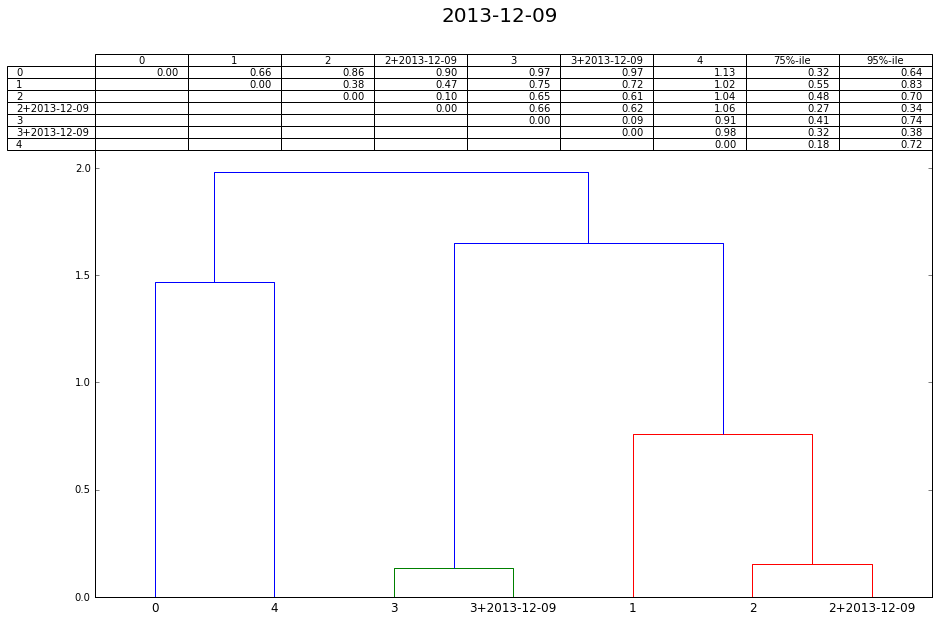

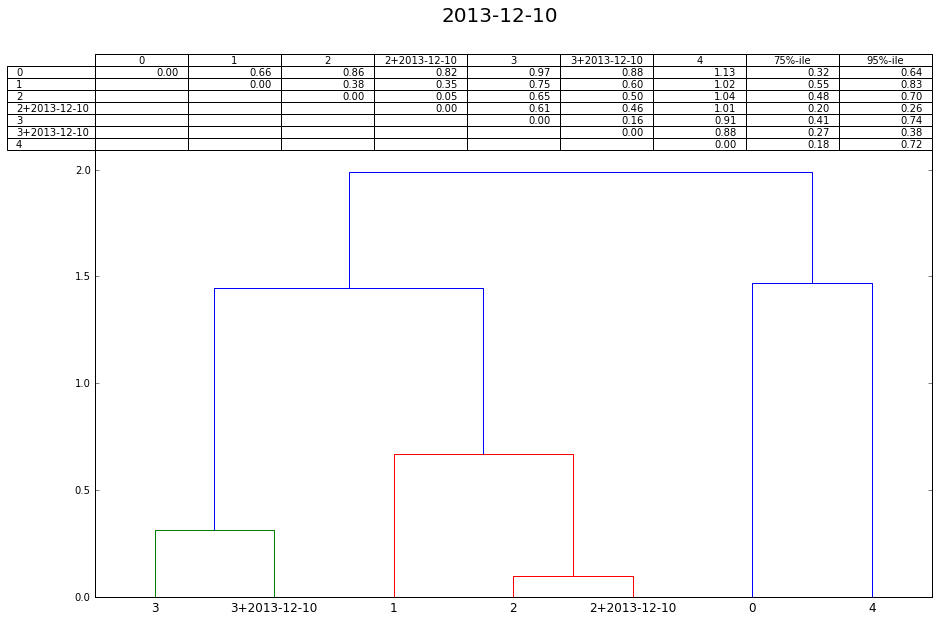

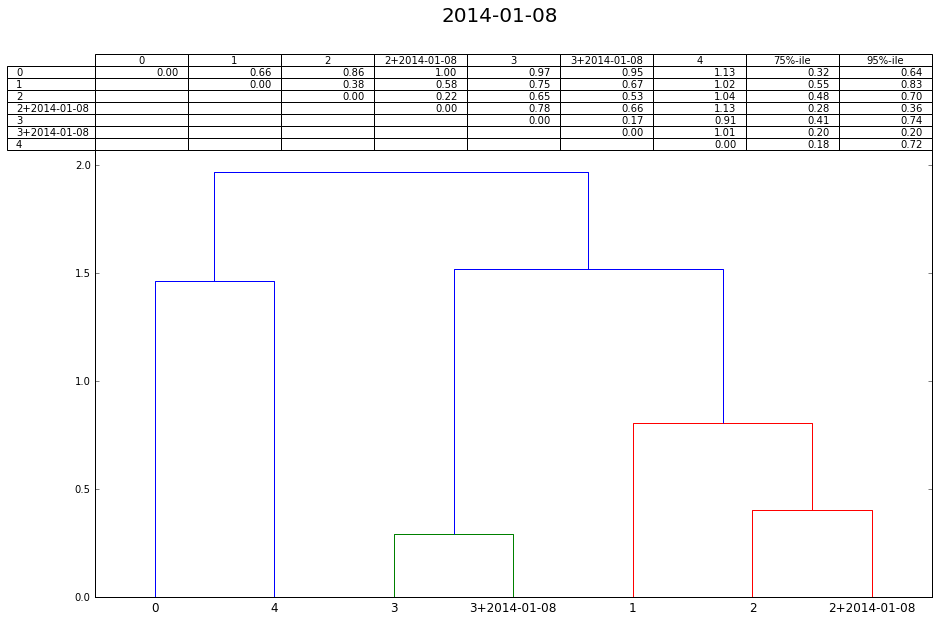

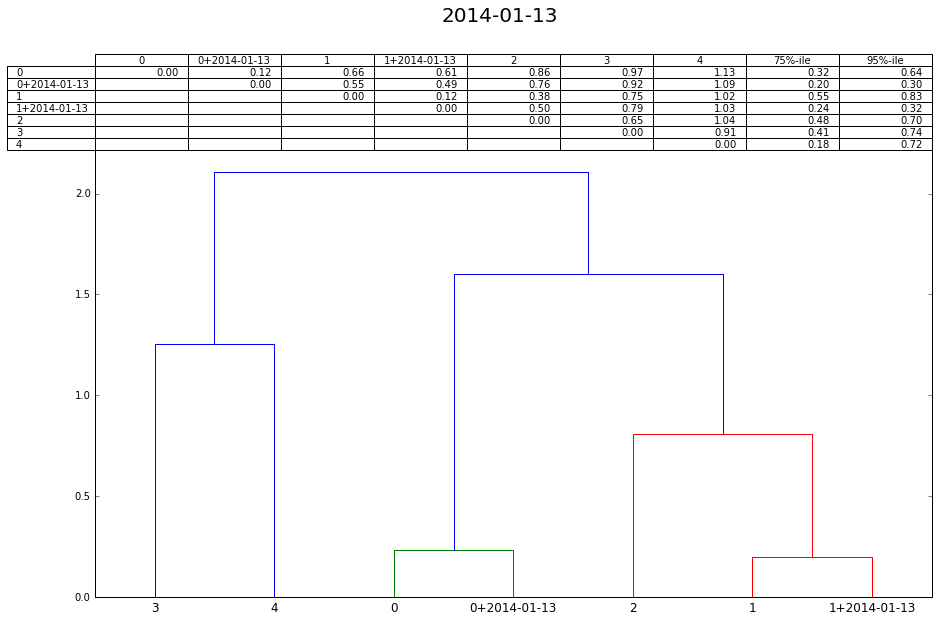

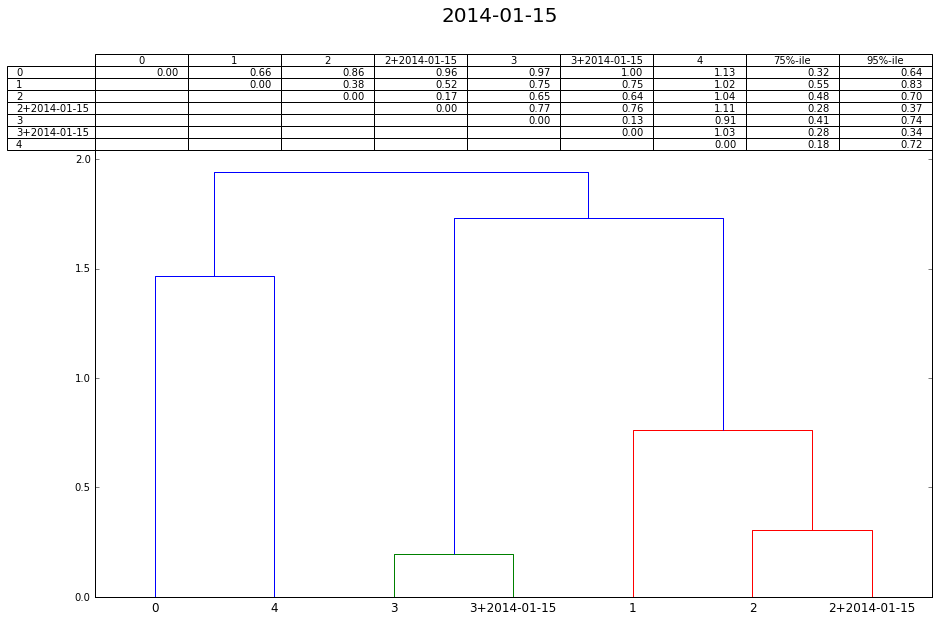

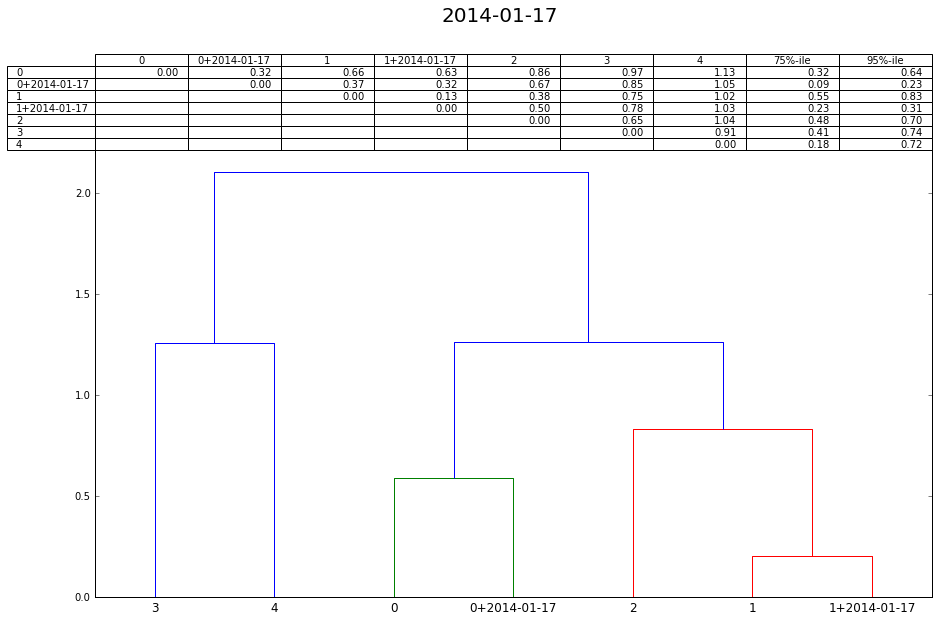

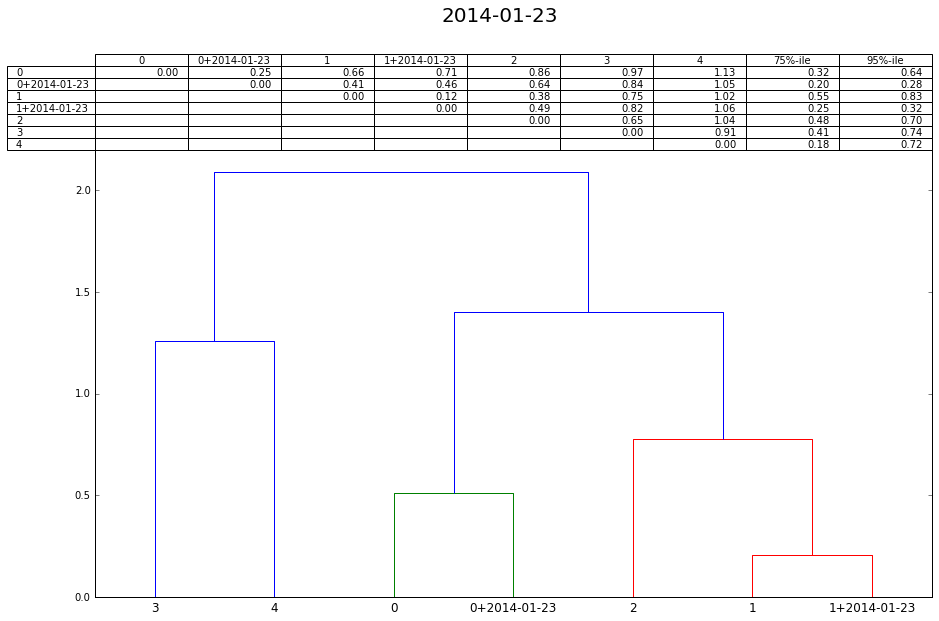

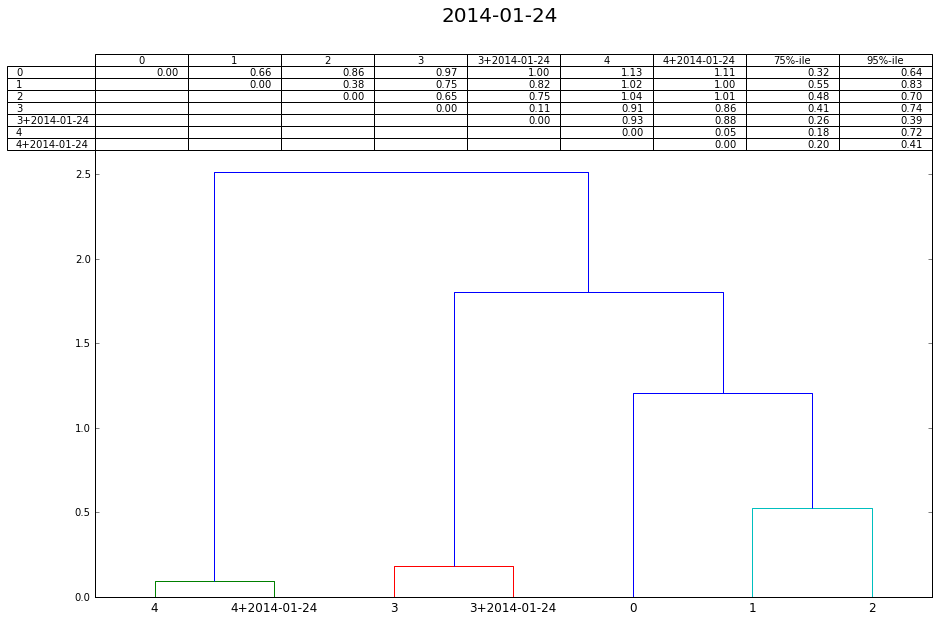

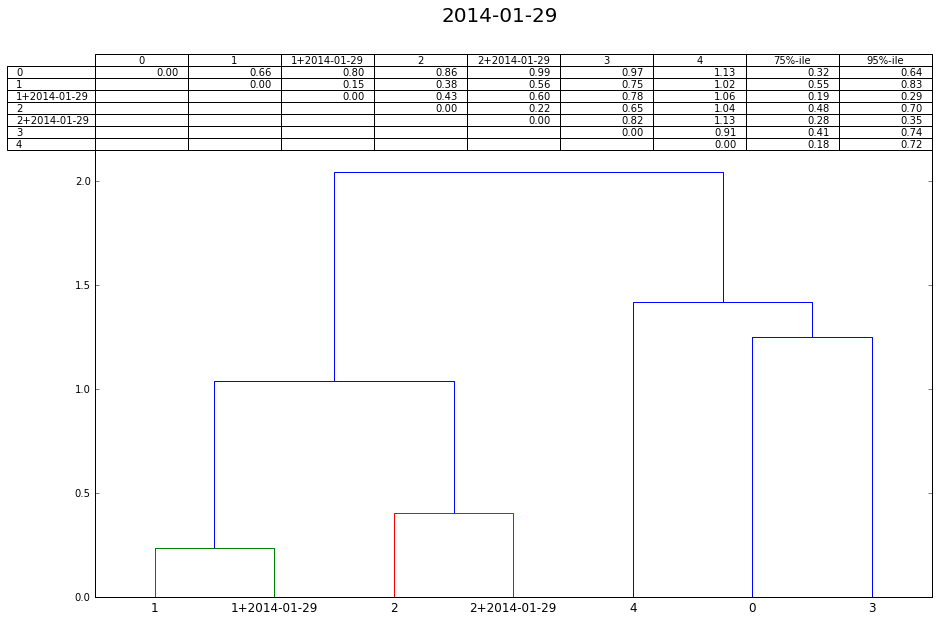

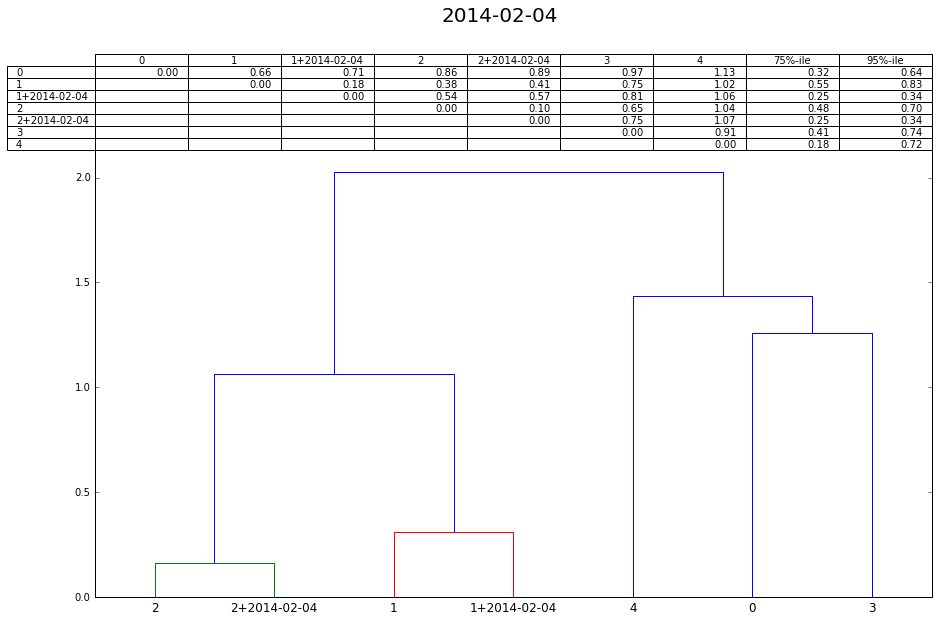

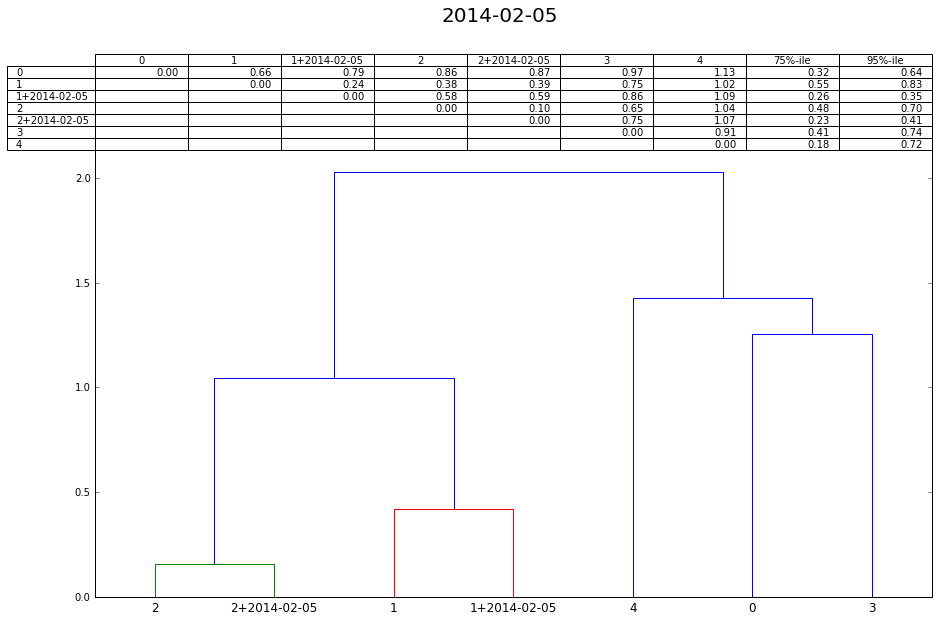

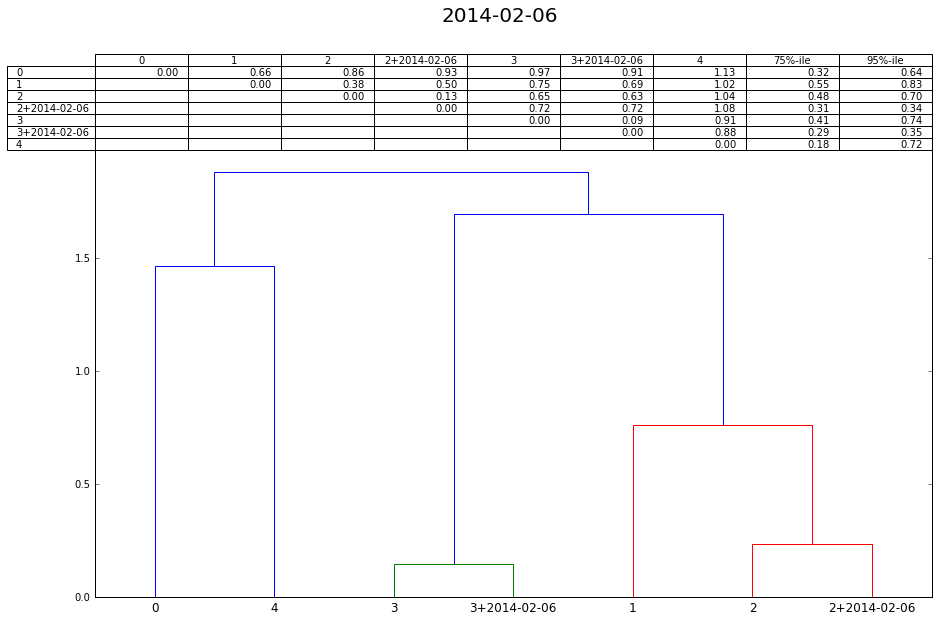

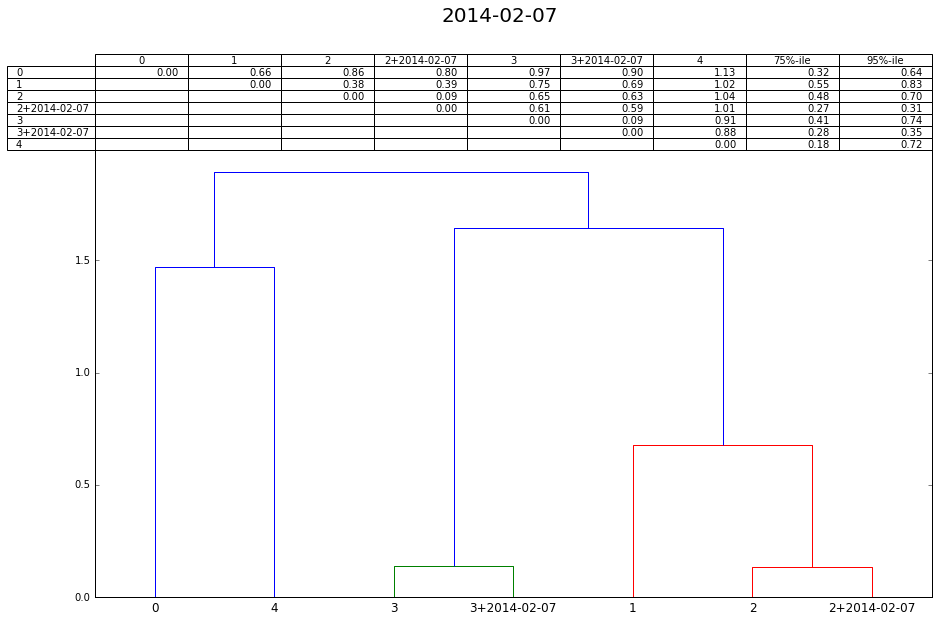

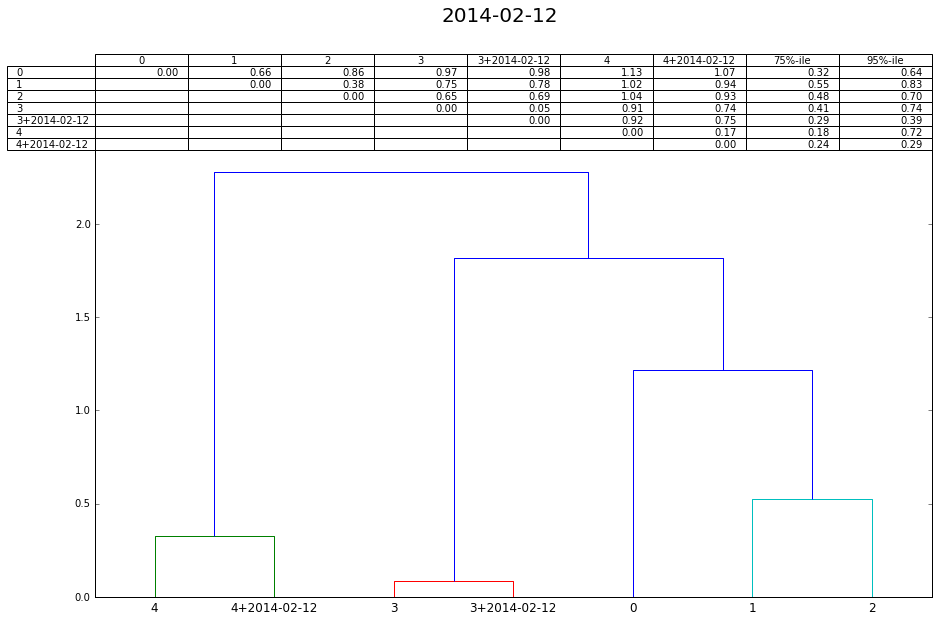

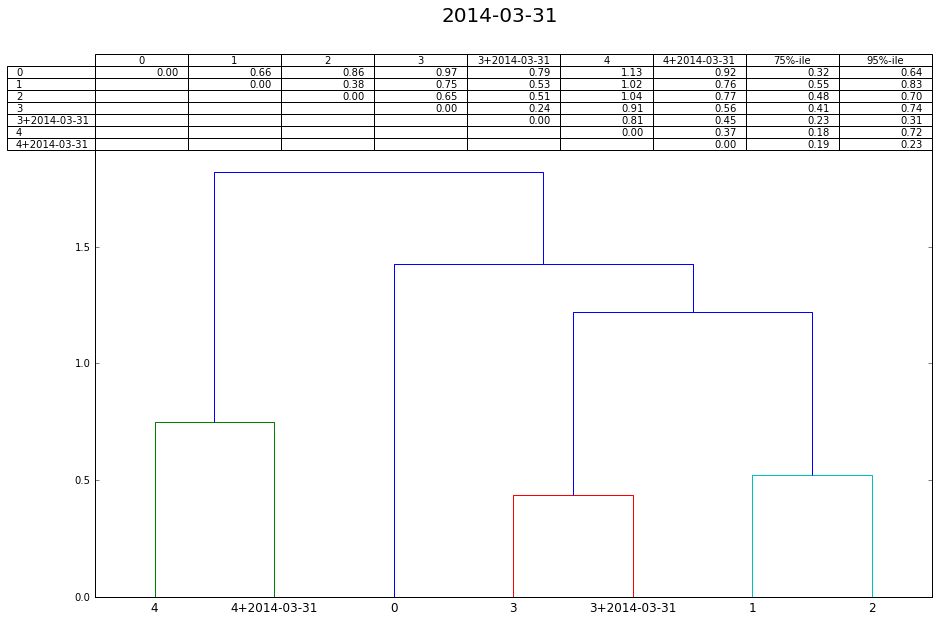

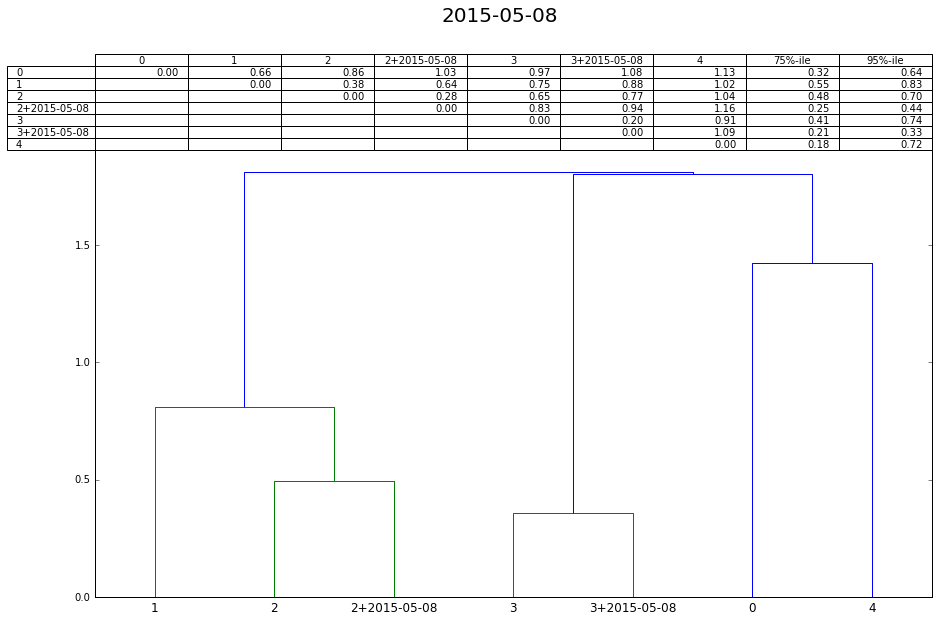

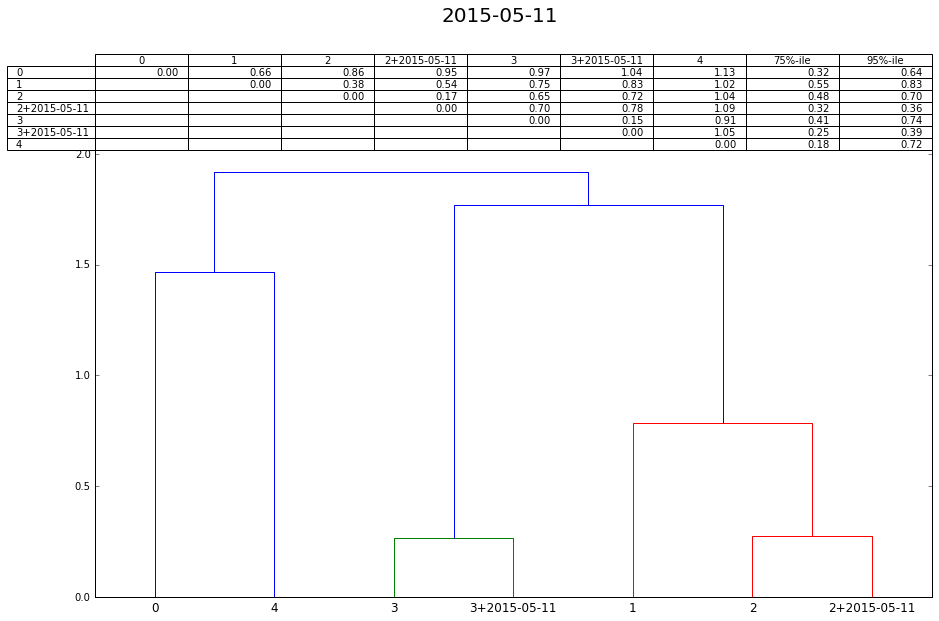

In [76]:
for day in collection_days:
    indices = np.where( [ _ == day for _ in trans_day_labels ] )[0]
    trans_day_space = trans_space[indices]
    trans_day_state_labels = trans_state_labels[indices]
    trans_day_state_labels = [ _ + '+' + day for _ in trans_day_state_labels ]
    state_plus_trans_day_space = np.vstack( (training_space, trans_day_space) )
    state_plus_trans_day_labels = training_labels + trans_day_state_labels
    fig = DendrogramPlusTable( state_plus_trans_day_space, state_plus_trans_day_labels, chart_title=day, figsize=(15,8))#, fig=None, ax=None):
    #fig = PerClassCDF( state_plus_trans_day_space, state_plus_trans_day_labels )
    #break
    #fig.savefig( 'transition_day_figures/' + day + '.pdf')